In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
data=pd.read_csv("/content/h1n1_vaccine_prediction.csv")


In [188]:
# # We need to tell whether the respondent received H1N1 flu vaccine or not
# ### hence it is a Classification problem because it says vaccine is received or not
#


In [189]:
# ## Data Visualizing

In [190]:
data.shape


(6750, 34)

In [191]:
data.tail(20)


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
6730,6730,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,1.0
6731,6731,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,NaN,Not Married,Own,Employed,Non-MSA,2.0,1.0,0.0
6732,6732,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0.0
6733,6733,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Other or Multiple,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0.0
6734,6734,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Black,Female,Below Poverty,Not Married,Own,Employed,Non-MSA,1.0,1.0,0.0
6735,6735,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,"MSA, Not Principle City",1.0,3.0,0.0
6736,6736,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,White,Male,NaN,Not Married,Own,Unemployed,Non-MSA,2.0,0.0,0.0
6737,6737,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,Other or Multiple,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",1.0,0.0,1.0
6738,6738,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,Non-MSA,0.0,0.0,0.0
6739,6739,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,1.0


In [192]:
duplicate=data.duplicated()
print(duplicate.sum())
0

0


0

<Axes: >

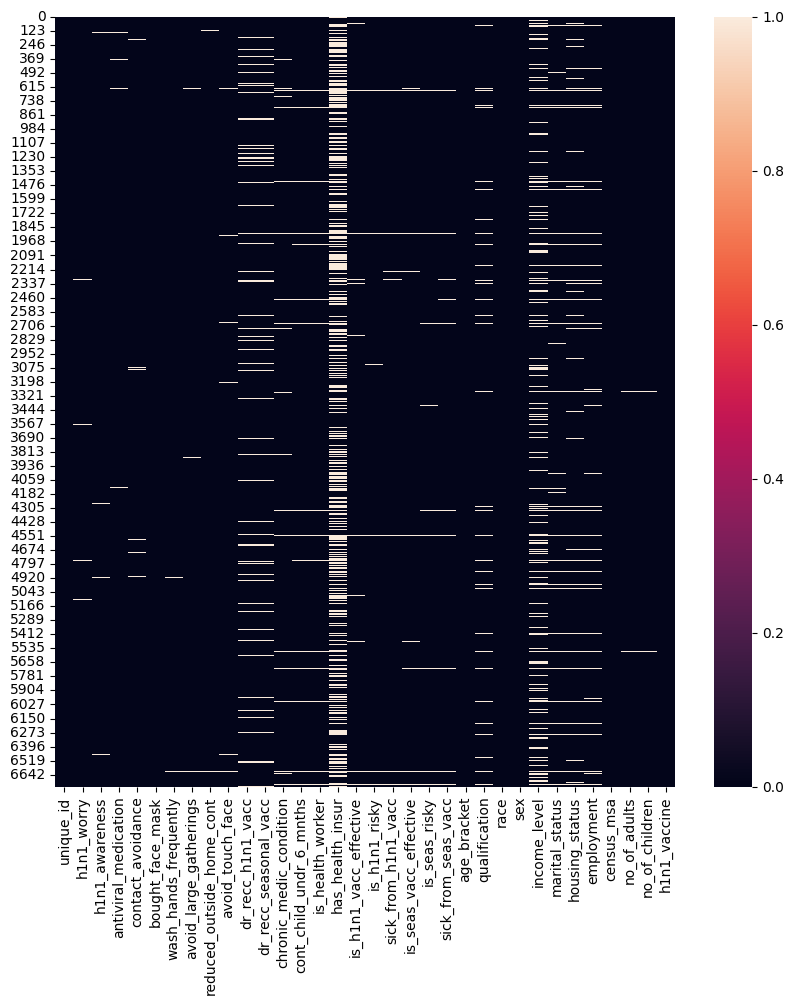

In [193]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())


<Axes: >

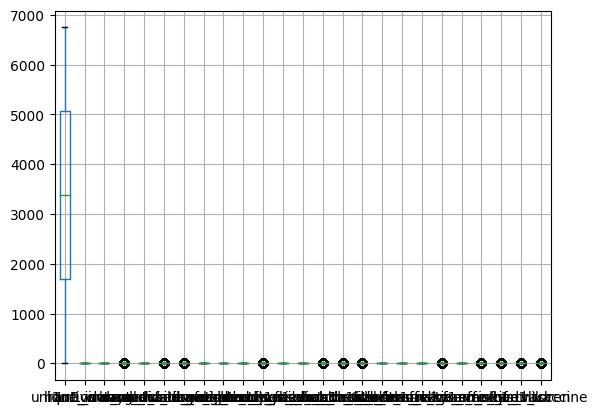

In [194]:
data.boxplot()


array([[<Axes: title={'center': 'unique_id'}>,
        <Axes: title={'center': 'h1n1_worry'}>,
        <Axes: title={'center': 'h1n1_awareness'}>,
        <Axes: title={'center': 'antiviral_medication'}>,
        <Axes: title={'center': 'contact_avoidance'}>],
       [<Axes: title={'center': 'bought_face_mask'}>,
        <Axes: title={'center': 'wash_hands_frequently'}>,
        <Axes: title={'center': 'avoid_large_gatherings'}>,
        <Axes: title={'center': 'reduced_outside_home_cont'}>,
        <Axes: title={'center': 'avoid_touch_face'}>],
       [<Axes: title={'center': 'dr_recc_h1n1_vacc'}>,
        <Axes: title={'center': 'dr_recc_seasonal_vacc'}>,
        <Axes: title={'center': 'chronic_medic_condition'}>,
        <Axes: title={'center': 'cont_child_undr_6_mnths'}>,
        <Axes: title={'center': 'is_health_worker'}>],
       [<Axes: title={'center': 'has_health_insur'}>,
        <Axes: title={'center': 'is_h1n1_vacc_effective'}>,
        <Axes: title={'center': 'is_h1n1_ri

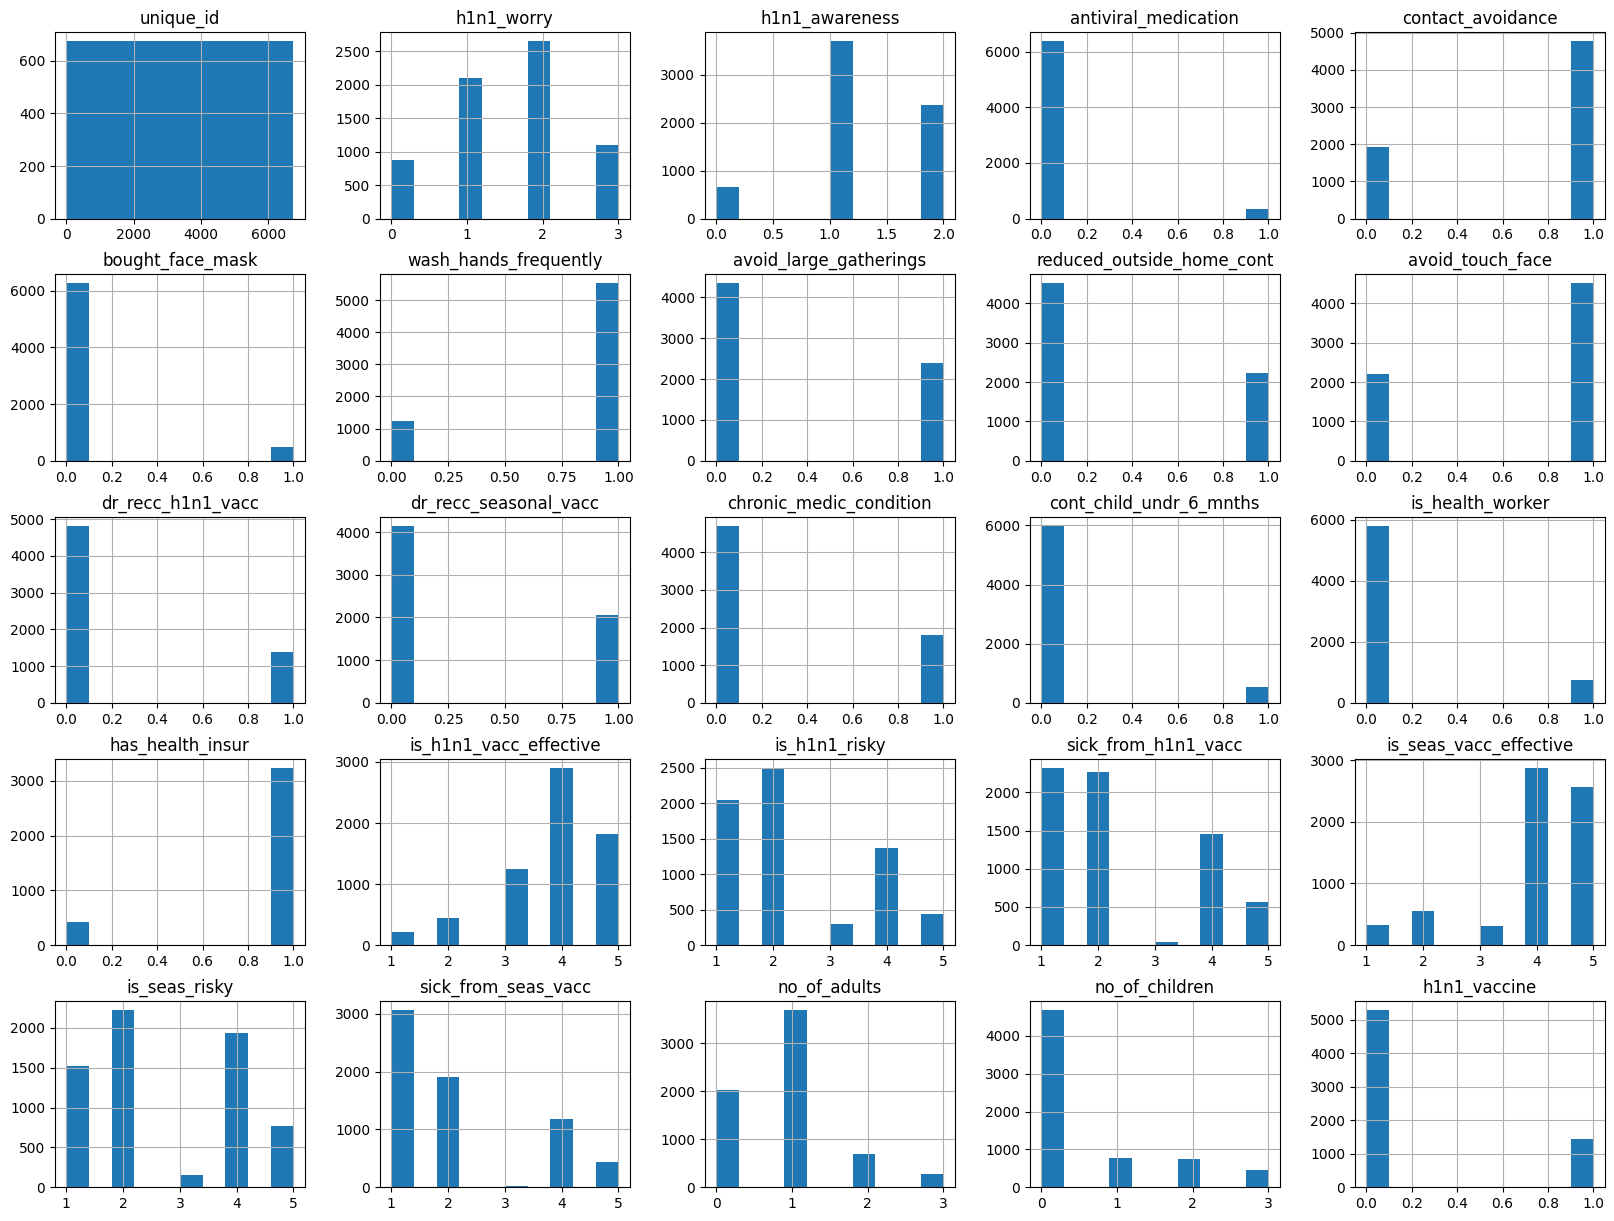

In [195]:
data.hist(figsize=(20,15))


In [196]:
# ## Data cleaning

# ### Here 0:not vaccinated ; 1: vaccinated

In [197]:
data["h1n1_vaccine"].value_counts()


0.0    5296
1.0    1453
Name: h1n1_vaccine, dtype: int64

In [198]:
data.groupby("h1n1_vaccine").mean()


<ipython-input-198-27ba038c6bbe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("h1n1_vaccine").mean()


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children
h1n1_vaccine,,,,,,,,,,,,,,,,,,,,,
0.0,3374.973943,1.549090,1.216509,0.048213,0.702497,0.060669,0.803403,0.354814,0.327521,0.657300,...,0.086677,0.864587,3.712226,2.131226,2.309359,3.919985,2.537158,2.093768,0.877143,0.546476
1.0,3370.450103,1.755356,1.394337,0.069945,0.752770,0.108201,0.873967,0.356108,0.337707,0.724066,...,0.212377,0.934880,4.375783,3.126829,2.493046,4.410615,3.430371,2.091544,0.917361,0.567361


In [199]:
data.isnull().sum()


unique_id                       0
h1n1_worry                     26
h1n1_awareness                 31
antiviral_medication           16
contact_avoidance              58
bought_face_mask                7
wash_hands_frequently           7
avoid_large_gatherings         24
reduced_outside_home_cont      25
avoid_touch_face               36
dr_recc_h1n1_vacc             548
dr_recc_seasonal_vacc         548
chronic_medic_condition       235
cont_child_undr_6_mnths       197
is_health_worker              193
has_health_insur             3095
is_h1n1_vacc_effective        110
is_h1n1_risky                  94
sick_from_h1n1_vacc            97
is_seas_vacc_effective        118
is_seas_risky                 126
sick_from_seas_vacc           135
age_bracket                     0
qualification                 357
race                            0
sex                             0
income_level                 1091
marital_status                359
housing_status                526
employment    

In [200]:
null_var=data.isnull().sum()/data.shape[0]*1000
null_var

unique_id                      0.000000
h1n1_worry                     3.851852
h1n1_awareness                 4.592593
antiviral_medication           2.370370
contact_avoidance              8.592593
bought_face_mask               1.037037
wash_hands_frequently          1.037037
avoid_large_gatherings         3.555556
reduced_outside_home_cont      3.703704
avoid_touch_face               5.333333
dr_recc_h1n1_vacc             81.185185
dr_recc_seasonal_vacc         81.185185
chronic_medic_condition       34.814815
cont_child_undr_6_mnths       29.185185
is_health_worker              28.592593
has_health_insur             458.518519
is_h1n1_vacc_effective        16.296296
is_h1n1_risky                 13.925926
sick_from_h1n1_vacc           14.370370
is_seas_vacc_effective        17.481481
is_seas_risky                 18.666667
sick_from_seas_vacc           20.000000
age_bracket                    0.000000
qualification                 52.888889
race                           0.000000


In [201]:
data.dtypes


unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [202]:

drop_columns=null_var[null_var>50].keys()
drop_columns


Index(['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'has_health_insur',
       'qualification', 'income_level', 'marital_status', 'housing_status',
       'employment'],
      dtype='object')

In [203]:
data.drop(['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'has_health_insur',
       'qualification', 'income_level', 'marital_status', 'housing_status',
       'employment'],axis=1,inplace=True)

In [204]:
data.drop('unique_id',axis=1,inplace=True)


In [205]:
data["age_bracket"]=data["age_bracket"].replace({1:"65+ Years", 2:"18 - 34 Years", 3:"55 - 64 Years",4:"35 - 44 Years", 5:"45 - 54 Years"})
data.sample(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine
3694,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,18 - 34 Years,White,Female,"MSA, Not Principle City",NaN,NaN,0.0
5012,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,5.0,2.0,4.0,45 - 54 Years,White,Female,"MSA, Not Principle City",2.0,0.0,0.0
4953,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,55 - 64 Years,White,Male,"MSA, Principle City",1.0,0.0,1.0
6543,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,2.0,1.0,35 - 44 Years,Other or Multiple,Male,"MSA, Not Principle City",0.0,1.0,0.0
5595,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,4.0,2.0,18 - 34 Years,White,Male,"MSA, Not Principle City",1.0,0.0,0.0
3893,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,5.0,4.0,2.0,65+ Years,White,Male,"MSA, Principle City",2.0,0.0,0.0
867,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,1.0,1.0,65+ Years,White,Female,"MSA, Principle City",1.0,0.0,0.0
5551,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5.0,4.0,1.0,45 - 54 Years,White,Female,"MSA, Principle City",0.0,0.0,0.0
4308,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,18 - 34 Years,White,Female,"MSA, Not Principle City",1.0,2.0,0.0
5203,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,4.0,4.0,1.0,45 - 54 Years,White,Female,Non-MSA,1.0,0.0,1.0


In [206]:
data=pd.get_dummies(data,columns=["age_bracket"])
data.sample(10)


,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years
2542,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Male,"MSA, Principle City",0.0,0.0,0.0,1,0,0,0,0
4518,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Female,"MSA, Principle City",2.0,0.0,1.0,1,0,0,0,0
6351,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Male,"MSA, Not Principle City",1.0,0.0,0.0,0,0,0,0,1
650,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Male,"MSA, Not Principle City",0.0,0.0,0.0,0,0,0,1,0
5079,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,Female,Non-MSA,1.0,0.0,0.0,0,1,0,0,0
2027,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Female,"MSA, Principle City",1.0,1.0,0.0,0,0,1,0,0
5678,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Female,"MSA, Not Principle City",0.0,0.0,1.0,0,0,0,0,1
5456,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Male,"MSA, Principle City",3.0,2.0,0.0,0,0,1,0,0
668,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Female,"MSA, Principle City",2.0,2.0,0.0,0,0,0,1,0
558,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Male,Non-MSA,1.0,0.0,1.0,0,0,0,0,1


In [207]:
data["race"]=data["race"].replace({1:"White", 2:"Black", 3:"Hispanic",4:"Other or Multiple"})
data.sample(10)


,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years
2294,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Female,Non-MSA,2.0,0.0,0.0,0,0,0,1,0
5290,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Male,"MSA, Not Principle City",0.0,0.0,0.0,0,0,0,0,1
3314,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Female,"MSA, Not Principle City",1.0,2.0,0.0,0,1,0,0,0
1532,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,Female,Non-MSA,2.0,0.0,1.0,0,1,0,0,0
1909,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Female,"MSA, Not Principle City",0.0,0.0,0.0,0,0,0,1,0
1552,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Male,"MSA, Principle City",1.0,0.0,0.0,0,0,0,1,0
6370,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Male,"MSA, Principle City",0.0,0.0,1.0,0,0,0,0,1
4081,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Female,Non-MSA,3.0,0.0,0.0,0,0,1,0,0
5405,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Male,"MSA, Not Principle City",1.0,2.0,0.0,0,1,0,0,0
589,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Male,"MSA, Principle City",1.0,3.0,0.0,0,1,0,0,0


In [208]:
data=pd.get_dummies(data,columns=["race"])
data.sample(10)


,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White
4384,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,1,0,0,0,0,1
405,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0,0,0,1,0,0,0,0,1
1328,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,1
6127,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0,0,0,0,1,0,0,0,1
4176,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0,0,1,0,0,0,0,0,1
6082,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0,0,0,0,1,0,0,0,1
1716,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,...,0.0,0,1,0,0,0,0,0,0,1
2632,3.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,1,0,0,0,0,1
3391,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0,1
2981,0.0,NaN,0.0,1.0,0.0,1.0,1.0,NaN,1.0,0.0,...,0.0,0,0,0,0,1,0,0,0,1


In [209]:
data["sex"]=data["sex"].replace({1:"Male", 2:"Female"})
data.sample(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White
5004,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1,0,0,0,0,0,0,0,1
2289,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1,0,0,0,0,0,0,1,0
2948,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0,1,0,0,0,0,0,1,0
3669,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,1,0,0,0,0,1
5885,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0,0,1,0,0,0,0,0,1
2954,3.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
6269,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1,0,0,0,0,0,0,0,1
52,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0,0,1,0,0,0,0,0,1
2951,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0,0,0,0,1,0,0,0,1
5817,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0,1


In [210]:
data=pd.get_dummies(data,columns=["sex"])
data.sample(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male
3191,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,1,0,1
5877,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
6298,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,1,0
5688,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0
3300,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,0,1,0,0,0,1,0
3935,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,1,1,0
1156,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,...,0,1,0,0,0,0,0,1,1,0
3212,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
5414,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,1,0,1
1699,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,1,0,0,0,1,0


In [211]:
data["census_msa"]=data["census_msa"].replace({1:"Non-MSA", 2:"MSA, Principle City", 3:"MSA, Not Principle City"})
data.sample(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male
2236,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1736,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,1,0
4803,3.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,1,0
565,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,1,0,0,1,0
5622,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
5440,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,1,1,0
5425,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,1,1,0
6557,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
873,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,1,1,0
4630,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,0,0,1,0,0,0,1,0,1,0


In [212]:
data=pd.get_dummies(data,columns=["census_msa"])
data.sample(10)


,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,age_bracket_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
4284,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,0,0
5248,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,1,0,0
4964,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,1,0,1,0,1,0
6748,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,1,0,1,0,0
2405,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,0,0,0,1,0,1,0
690,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
3572,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,0,0
4850,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,1
2845,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,1,1,0,0,0,1
396,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,1,0,0,1


In [213]:
data["avoid_touch_face"] = data["avoid_touch_face"].fillna(data["avoid_touch_face"].mean())


In [214]:
data["reduced_outside_home_cont"] = data["reduced_outside_home_cont"].fillna(data["reduced_outside_home_cont"].mean())


In [215]:
data["avoid_large_gatherings"] = data["avoid_large_gatherings"].fillna(data["avoid_large_gatherings"].mean())


In [216]:
data["wash_hands_frequently"] = data["wash_hands_frequently"].fillna(data["wash_hands_frequently"].median())


In [217]:
data["h1n1_worry"] = data["h1n1_worry"].fillna(data["h1n1_worry"].median())


In [218]:
data["h1n1_awareness"] = data["h1n1_awareness"].fillna(data["h1n1_awareness"].median())


In [219]:
data["antiviral_medication"] = data["antiviral_medication"].fillna(data["antiviral_medication"].median())


In [220]:
data["bought_face_mask"] = data["bought_face_mask"].fillna(data["bought_face_mask"].mean())


In [221]:
data["is_h1n1_vacc_effective"] = data["is_h1n1_vacc_effective"].fillna(data["is_h1n1_vacc_effective"].median())


In [222]:
data["contact_avoidance"] = data["contact_avoidance"].fillna(data["contact_avoidance"].median())


In [223]:
data["is_h1n1_vacc_effective"] = data["is_h1n1_vacc_effective"].fillna(data["is_h1n1_vacc_effective"].median())


In [224]:
data["is_h1n1_risky"] = data["is_h1n1_risky"].fillna(data["is_h1n1_risky"].median())


In [225]:
data["sick_from_h1n1_vacc"] = data["sick_from_h1n1_vacc"].fillna(data["sick_from_h1n1_vacc"].median())


In [226]:
data["is_seas_vacc_effective"] = data["is_seas_vacc_effective"].fillna(data["is_seas_vacc_effective"].median())


In [227]:
data["sick_from_h1n1_vacc"] = data["sick_from_h1n1_vacc"].fillna(data["sick_from_h1n1_vacc"].median())


In [228]:
data["no_of_adults"] = data["no_of_adults"].fillna(data["no_of_adults"].median())


In [229]:
data["no_of_children"] = data["no_of_children"].fillna(data["no_of_children"].median())


In [230]:
data["h1n1_vaccine"] = data["h1n1_vaccine"].fillna(data["h1n1_vaccine"].median())


In [231]:
data["is_seas_risky"] = data["is_seas_risky"].fillna(data["is_seas_risky"].median())


In [232]:
data["sick_from_seas_vacc"] = data["sick_from_seas_vacc"].fillna(data["sick_from_seas_vacc"].median())


In [233]:
data["chronic_medic_condition"] = data["chronic_medic_condition"].fillna(data["chronic_medic_condition"].median())


In [234]:
data["cont_child_undr_6_mnths"] = data["cont_child_undr_6_mnths"].fillna(data["cont_child_undr_6_mnths"].median())


In [235]:
data["is_health_worker"] = data["is_health_worker"].fillna(data["is_health_worker"].median())


In [236]:
data.isnull().sum()


h1n1_worry                             0
h1n1_awareness                         0
antiviral_medication                   0
contact_avoidance                      0
bought_face_mask                       0
wash_hands_frequently                  0
avoid_large_gatherings                 0
reduced_outside_home_cont              0
avoid_touch_face                       0
chronic_medic_condition                0
cont_child_undr_6_mnths                0
is_health_worker                       0
is_h1n1_vacc_effective                 0
is_h1n1_risky                          0
sick_from_h1n1_vacc                    0
is_seas_vacc_effective                 0
is_seas_risky                          0
sick_from_seas_vacc                    0
no_of_adults                           0
no_of_children                         0
h1n1_vaccine                           0
age_bracket_18 - 34 Years              0
age_bracket_35 - 44 Years              0
age_bracket_45 - 54 Years              0
age_bracket_55 -

In [237]:
data.dtypes


h1n1_worry                             float64
h1n1_awareness                         float64
antiviral_medication                   float64
contact_avoidance                      float64
bought_face_mask                       float64
wash_hands_frequently                  float64
avoid_large_gatherings                 float64
reduced_outside_home_cont              float64
avoid_touch_face                       float64
chronic_medic_condition                float64
cont_child_undr_6_mnths                float64
is_health_worker                       float64
is_h1n1_vacc_effective                 float64
is_h1n1_risky                          float64
sick_from_h1n1_vacc                    float64
is_seas_vacc_effective                 float64
is_seas_risky                          float64
sick_from_seas_vacc                    float64
no_of_adults                           float64
no_of_children                         float64
h1n1_vaccine                           float64
age_bracket_1

In [238]:
# # Again visualizing after cleaning the data


<Axes: >

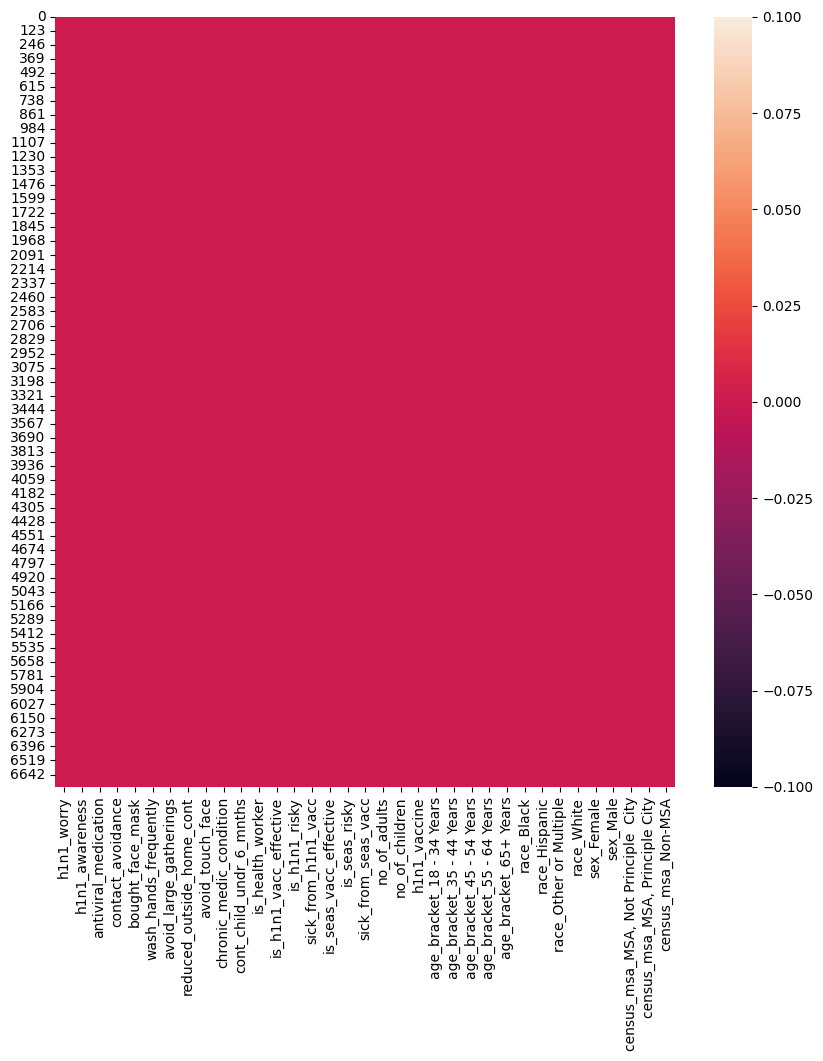

In [239]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())


array([[<Axes: title={'center': 'h1n1_worry'}>,
        <Axes: title={'center': 'h1n1_awareness'}>,
        <Axes: title={'center': 'antiviral_medication'}>,
        <Axes: title={'center': 'contact_avoidance'}>,
        <Axes: title={'center': 'bought_face_mask'}>,
        <Axes: title={'center': 'wash_hands_frequently'}>],
       [<Axes: title={'center': 'avoid_large_gatherings'}>,
        <Axes: title={'center': 'reduced_outside_home_cont'}>,
        <Axes: title={'center': 'avoid_touch_face'}>,
        <Axes: title={'center': 'chronic_medic_condition'}>,
        <Axes: title={'center': 'cont_child_undr_6_mnths'}>,
        <Axes: title={'center': 'is_health_worker'}>],
       [<Axes: title={'center': 'is_h1n1_vacc_effective'}>,
        <Axes: title={'center': 'is_h1n1_risky'}>,
        <Axes: title={'center': 'sick_from_h1n1_vacc'}>,
        <Axes: title={'center': 'is_seas_vacc_effective'}>,
        <Axes: title={'center': 'is_seas_risky'}>,
        <Axes: title={'center': 'sick_fr

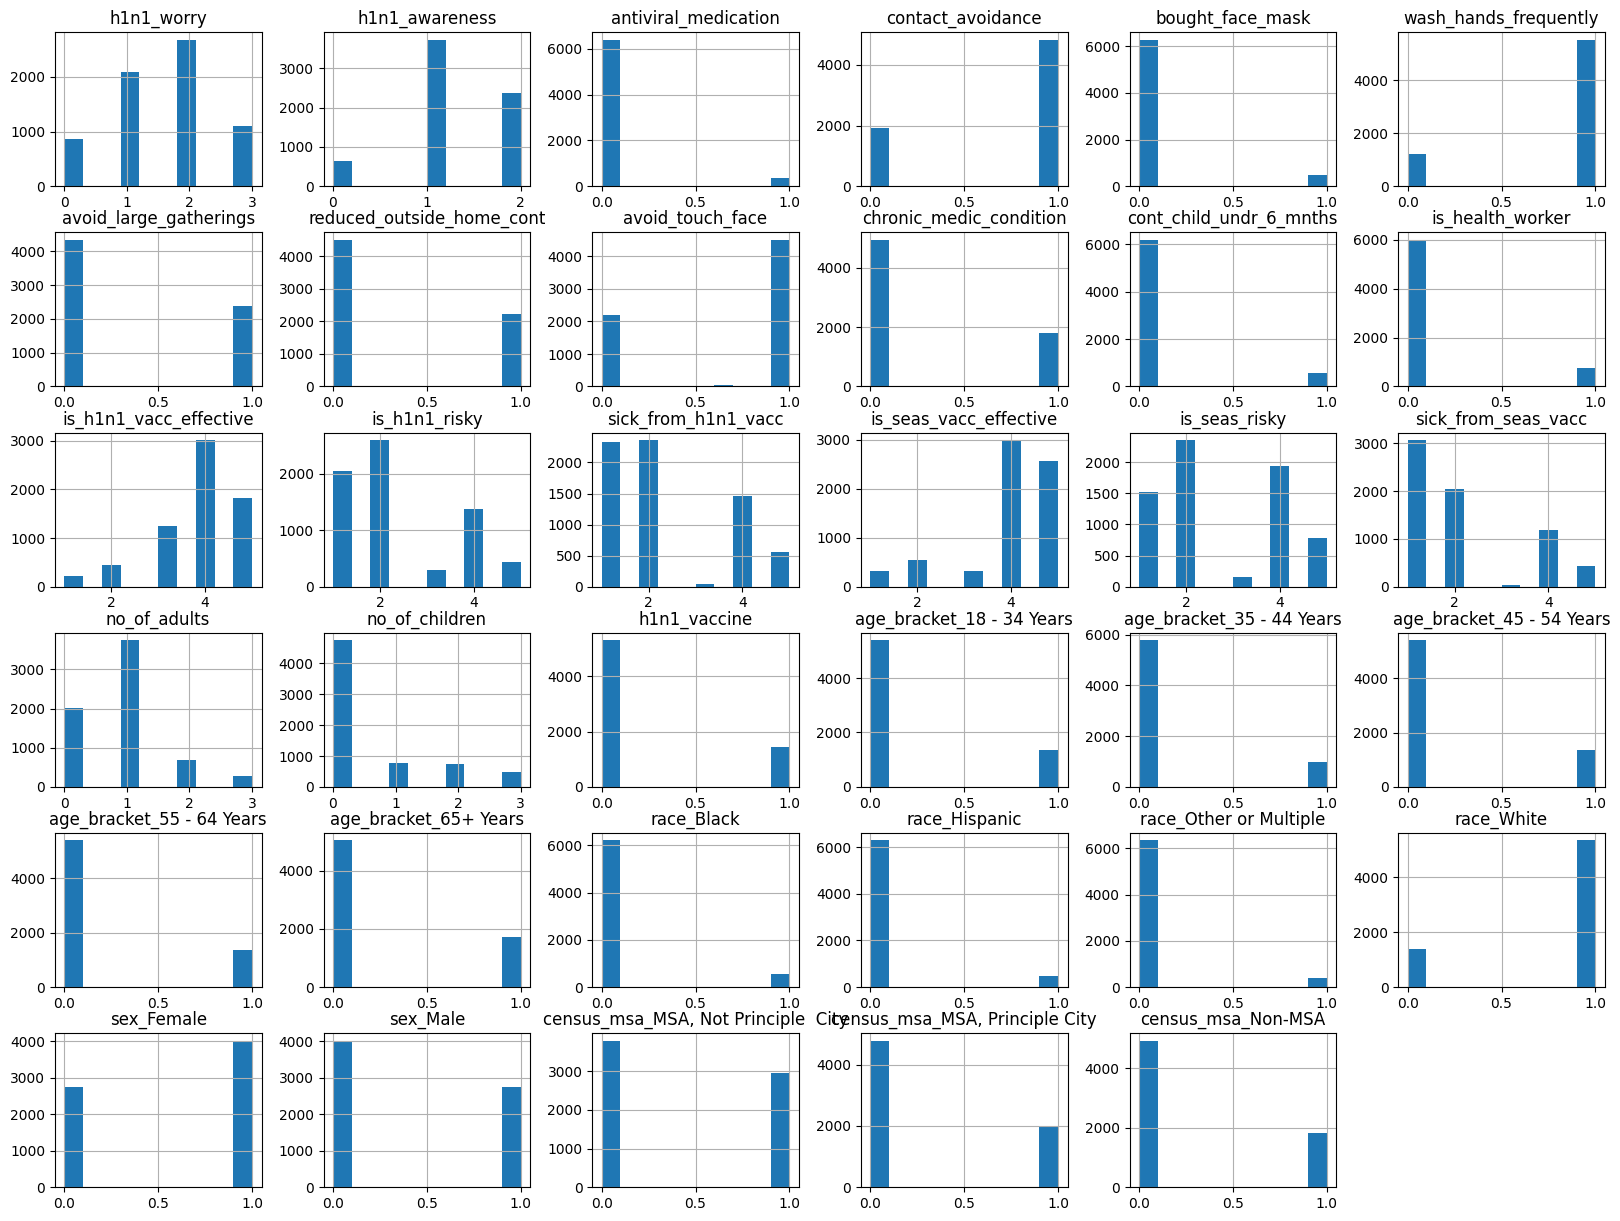

In [240]:
data.hist(figsize=(20,15))


In [241]:
# ## Modelling


In [242]:
X = data.drop(["h1n1_vaccine"], axis=1)
#dependent variable
Y= data[["h1n1_vaccine"]]

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [244]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)


In [245]:
# ### LogisticRegression


In [246]:
lrc = LogisticRegression()
lrc.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [247]:
lrc.score(X_train, Y_train)


0.8127777777777778

In [248]:
lrc.score(X_test, Y_test)


0.7955555555555556

In [249]:
# ### LogisticRegression with Standardization


In [250]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
lrc.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [251]:
lrc.score(X_train, Y_train)


0.8124074074074074

In [252]:
lrc.score(X_test, Y_test)


0.794074074074074

In [253]:
# ### Naive bayes


In [254]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [255]:
gnb.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [256]:
gnb.score(X_test,Y_test)


0.7392592592592593

In [257]:
scaler_1= StandardScaler()
X_train=scaler_1.fit_transform(X_train)
X_test=scaler_1.fit_transform(X_test)

In [258]:
gnb.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [259]:
gnb.score(X_train,Y_train)


0.7388888888888889

In [260]:
gnb.score(X_test,Y_test)


0.7392592592592593

In [261]:
bnb.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [262]:
bnb.score(X_test,Y_test)


0.7718518518518519

In [263]:
bnb.score(X_train,Y_train)


0.7759259259259259

In [264]:
scaler_2= StandardScaler()
X_train=scaler_2.fit_transform(X_train)
X_test=scaler_2.fit_transform(X_test)

In [265]:
bnb.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [266]:
bnb.score(X_train,Y_train)


0.7759259259259259

In [267]:
bnb.score(X_test,Y_test)


0.7718518518518519

In [268]:
# ### Support Vector Machine


In [269]:
svc =SVC(kernel='sigmoid', gamma=1.0)


In [270]:
svc.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=1.0, kernel='sigmoid')

In [271]:
svc.score(X_train,Y_train)


0.7105555555555556

In [272]:
svc.score(X_test,Y_test)


0.7022222222222222

In [273]:
knn = KNeighborsClassifier()


In [274]:
knn.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [275]:
knn.score(X_train,Y_train)


0.835

In [276]:
knn.score(X_test,Y_test)


0.7755555555555556

In [277]:

# ### DecisionTreeClassifier


In [278]:
dtc=DecisionTreeClassifier(max_depth=4, random_state=2)


In [279]:
dtc.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=4, random_state=2)

In [280]:
dtc.score(X_train,Y_train)


0.8125925925925926

In [281]:
dtc.score(X_test,Y_test)


0.8

In [282]:
# ### BaggingClassifier
bc = BaggingClassifier(n_estimators=50,max_samples=1000, n_jobs=5)
bc.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(max_samples=1000, n_estimators=50, n_jobs=5)

In [283]:
bc.score(X_train,Y_train)

0.8637037037037038

In [284]:
bc.score(X_test,Y_test)


0.8022222222222222

In [285]:
# ### AdaBoostClassifier


In [286]:
abc= AdaBoostClassifier(n_estimators=50, random_state=2)


In [287]:
abc.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=2)

In [288]:
abc.score(X_train,Y_train)


0.8125925925925926

In [289]:
abc.score(X_test,Y_test)


0.797037037037037

In [290]:

# ### RandomForestClassifier
rfc= RandomForestClassifier(max_samples=1000,random_state=3)
rfc.fit(X_train,Y_train)


<ipython-input-290-c186deca4425>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,Y_train)


RandomForestClassifier(max_samples=1000, random_state=3)

In [291]:
rfc.score(X_train,Y_train)


0.8566666666666667

In [292]:
rfc.score(X_test,Y_test)


0.8037037037037037

In [293]:
# ### GradientBoostingClassifier
gbdt= GradientBoostingClassifier(random_state=2,n_estimators=50)
gbdt.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=50, random_state=2)

In [294]:
gbdt.score(X_train,Y_train)


0.8233333333333334

In [295]:
gbdt.score(X_test,Y_test)


0.802962962962963

In [296]:
# ## Now finding Accuracy and Precision

In [297]:
clfs = {
 'SVC' : svc,
    'KN' : knn,
    'BN' : bnb,
    'GB': gnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC': bc,
    'GBDT':gbdt,


}

In [298]:
def train_classifier(clf,X_train,X_test,Y_train,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy= accuracy_score(Y_test,Y_pred)
    precision= precision_score(Y_test,Y_pred)

    return accuracy,precision

In [299]:
accuracy_scores= []
precision_scores=[]

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,Y_train,Y_test)

    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  SVC
Accuracy -  0.7022222222222222
Precision -  0.31921824104234525
For  KN
Accuracy -  0.7755555555555556
Precision -  0.45454545454545453
For  BN
Accuracy -  0.7718518518518519
Precision -  0.4693140794223827
For 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 GB
Accuracy -  0.7392592592592593
Precision -  0.41456582633053224
For  DT
Accuracy -  0.8
Precision -  0.562874251497006
For  LR
Accuracy -  0.794074074074074
Precision -  0.5474452554744526


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-298-a410f8fc1bb8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)


For  RF
Accuracy -  0.8037037037037037
Precision -  0.6413043478260869


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  AdaBoost
Accuracy -  0.797037037037037
Precision -  0.5578231292517006


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  BgC
Accuracy -  0.7962962962962963
Precision -  0.5645161290322581


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  GBDT
Accuracy -  0.802962962962963
Precision -  0.6016260162601627


In [300]:
performance_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [301]:
performance_df

,Algorithm,Accuracy,Precision
6,RF,0.803704,0.641304
9,GBDT,0.802963,0.601626
8,BgC,0.796296,0.564516
4,DT,0.800000,0.562874
7,AdaBoost,0.797037,0.557823
5,LR,0.794074,0.547445
2,BN,0.771852,0.469314
1,KN,0.775556,0.454545
3,GB,0.739259,0.414566
0,SVC,0.702222,0.319218


In [302]:
 #Hence Random Forest gives higher Acuuracy and precision than other algorithms